In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


In [2]:
import json
with open("/content/drive/MyDrive/data.json", "r") as file:
    data = json.load(file)

In [3]:
data

[{'pitr': '1682015957',
  'type': 'position',
  'ident': 'QTR176',
  'air_ground': 'A',
  'adsb_version': '2',
  'alt': '38975',
  'altChange': ' ',
  'atcident': 'QTR36F',
  'clock': '1682015952',
  'dest': 'OTHH',
  'facility_hash': 'F9AC31B4626425A3',
  'facility_name': 'FlightAware ADS-B',
  'id': 'QTR176-1681826580-schedule-0777',
  'gs': '495',
  'heading': '142',
  'heading_magnetic': '141.7',
  'hexid': '06A2E8',
  'lat': '31.91217',
  'lon': '46.53798',
  'mach': '0.848',
  'nav_heading': '141.3',
  'nav_altitude': '39008',
  'nav_modes': 'autopilot lnav tcas vnav',
  'nav_qnh': '1012.8',
  'nac_p': 8,
  'nac_v': 1,
  'nic': 8,
  'nic_baro': 1,
  'orig': 'ENGM',
  'pos_rc': 186,
  'pressure': '196',
  'reg': 'A7BHE',
  'sil': 2,
  'sil_type': 'unknown',
  'speed_ias': '263',
  'speed_tas': '488',
  'squawk': '1016',
  'temperature': '-55',
  'temperature_quality': '1',
  'updateType': 'A',
  'vertRate': '0',
  'vertRate_geom': '0',
  'wind_dir': '246',
  'wind_speed': '35',
  

In [4]:
import pandas as pd
df = pd.DataFrame(data)


In [5]:
df

,pitr,type,ident,air_ground,adsb_version,alt,altChange,atcident,clock,dest,...,temperature_quality,updateType,vertRate,vertRate_geom,wind_dir,wind_speed,wind_quality,alt_gnss,aircrafttype,heading_true
0,1682015957,position,QTR176,A,2,38975,,QTR36F,1682015952,OTHH,...,1,A,0,0,246,35,1,NaN,NaN,NaN
1,1682015958,position,UAE379,A,2,36000,,NaN,1682015952,OMDB,...,1,A,0,0,273,97,1,NaN,NaN,NaN
2,1682015958,position,FDB1721,A,2,25525,,NaN,1682015952,UAAA,...,NaN,A,1600,NaN,NaN,NaN,NaN,26400,NaN,NaN
3,1682015958,position,ETD857,A,2,350,,NaN,1682015952,OMAA,...,0,A,-736,-832,259,2,1,150,NaN,NaN
4,1682015958,position,QTR675,A,2,36000,,QTR6Q,1682015952,OTHH,...,1,A,0,0,264,93,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39087,1682019010,position,UAE88,A,2,8175,,NaN,1682019004,OMDB,...,0,A,0,0,189,7,1,8350,NaN,NaN
39088,1682019010,position,UAE954,A,2,39000,,NaN,1682019004,OMDB,...,1,A,0,0,253,69,1,NaN,NaN,NaN
39089,1682019010,position,THY774,A,2,33000,,THY3LY,1682018998,OOMS,...,1,A,0,0,266,39,1,NaN,NaN,NaN
39090,1682019010,position,ABY402,A,2,7925,D,NaN,1682019004,OMSJ,...,0,A,-1792,-1792,87,5,1,8175,NaN,NaN


In [13]:
altitude = ['alt']
latitude = ['lat']
longitude = ['lon']
position = altitude + latitude + longitude
ground_speed = ['gs'] # heading



In [14]:
data_for_LOF = position + ground_speed

df = df.dropna(subset=data_for_LOF)

In [15]:
df
df_cleaned = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder


# Convert all data to numeric and ensure float dtype
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce').dropna().astype(float)
print(df_cleaned[data_for_LOF])
print(f"Number of data points: {len(df_cleaned)}")

# Normalize Data using StandardScaler
scaler = StandardScaler()
df_cleaned.iloc[:, :] = scaler.fit_transform(df_cleaned)

            alt       lat       lon        gs
0      0.714311  1.472157 -0.656038  0.824292
1      0.395132 -1.136679  1.311252  0.021192
2     -0.780259  0.394924  0.906023  0.201664
3      0.281139 -0.712864  0.515666 -2.234707
4      0.395132 -0.722316  0.483919  0.030216
...         ...       ...       ...       ...
39087  1.413465 -0.080768  0.659743 -1.079687
39088  0.719377  0.777962 -0.520294  1.311566
39089  0.060753  0.797087 -0.055472  0.508466
39090  1.385600 -0.269815  0.976796 -1.034569
39091  1.403333 -0.381703 -0.677449 -1.575984

[32839 rows x 4 columns]
Number of data points: 32839


In [20]:
df_cleaned


,pitr,type,ident,air_ground,adsb_version,alt,altChange,atcident,clock,dest,...,temperature_quality,updateType,vertRate,vertRate_geom,wind_dir,wind_speed,wind_quality,alt_gnss,aircrafttype,heading_true
0,-1.759367,0.0,0.413384,0.0,0.030239,0.714311,-0.843034,-2.714933,-1.759948,0.186058,...,0.109283,0.0,0.068633,-0.028951,-0.540555,-0.523758,-0.003744,0.663754,0.100451,0.037317
1,-1.758212,0.0,1.325691,0.0,0.030239,0.395132,-0.843034,0.374216,-1.759948,-0.260464,...,0.109283,0.0,0.068633,-0.028951,-0.105610,1.363710,-0.003744,0.663754,0.100451,0.037317
2,-1.758212,0.0,-0.863846,0.0,0.030239,-0.780259,-0.843034,0.374216,-1.759948,0.334898,...,2.012108,0.0,0.404420,1.887992,2.315578,1.431931,2.191894,-1.041092,0.100451,0.037317
3,-1.758212,0.0,-1.073140,0.0,0.030239,0.281139,-0.843034,0.374216,-1.759948,-0.334885,...,-1.793543,0.0,-0.107256,-0.119008,-0.337581,-1.069532,-0.003744,-2.050488,0.100451,0.037317
4,-1.758212,0.0,0.531447,0.0,0.030239,0.395132,-0.843034,-2.049578,-1.759948,0.186058,...,0.109283,0.0,0.068633,-0.028951,-0.250592,1.272747,-2.199382,0.663754,0.100451,0.037317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39087,1.693908,0.0,1.492052,0.0,0.030239,1.413465,-0.843034,0.374216,1.693643,-0.260464,...,-1.793543,0.0,0.068633,-0.028951,-1.468435,0.363124,-0.003744,0.520690,0.100451,0.037317
39088,1.693908,0.0,1.518885,0.0,0.030239,0.719377,-0.843034,0.374216,1.693643,-0.260464,...,0.109283,0.0,0.068633,-0.028951,-0.424570,0.340384,-0.003744,0.663754,0.100451,0.037317
39089,1.693908,0.0,1.143229,0.0,0.030239,0.060753,-0.843034,-1.574324,1.686849,-0.148834,...,0.109283,0.0,0.068633,-0.028951,-0.221596,-0.432796,-0.003744,0.663754,0.100451,0.037317
39090,1.693908,0.0,-1.641990,0.0,0.030239,1.385600,1.446067,0.374216,1.693643,-0.186044,...,-1.793543,0.0,-1.658276,-1.572797,2.112605,-0.159909,-0.003744,0.504794,0.100451,0.037317


In [22]:
def find_optimal_neighbors_gradient_descent(df, data_for_LOF, initial_neighbors=5, learning_rate=0.1, tolerance=3, patience=5, max_iterations=100):
    n_neighbors = initial_neighbors
    prev_anomalies = None
    no_decrease_count = 0
    best_n_neighbors = n_neighbors
    best_anomalies = float('inf')

    X = df[data_for_LOF].values

    for iteration in range(max_iterations):
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination="auto")
        anomalies = lof.fit_predict(X)
        num_anomalies = np.sum(anomalies == -1)

        print(f"Iteration: {iteration}, Neighbors: {n_neighbors}, Anomalies: {num_anomalies}")

        if num_anomalies < best_anomalies:
            best_anomalies = num_anomalies
            best_n_neighbors = n_neighbors

        if num_anomalies == 0:
            break

        if prev_anomalies is not None:
            delta_anomalies = prev_anomalies - num_anomalies

            if delta_anomalies <= 0:
                no_decrease_count += 1
            else:
                no_decrease_count = 0

            if no_decrease_count >= tolerance:
                print("Stopping early as anomalies are not decreasing.")
                break

            if iteration >= patience and num_anomalies >= prev_anomalies:
                print("Stopping due to lack of improvement.")
                break

            step_size = max(1, min(int(abs(delta_anomalies) * learning_rate), 10))  # Cap step size at 10
        else:
            step_size = 1

        n_neighbors += step_size
        prev_anomalies = num_anomalies

    df['anomaly'] = lof.fit_predict(X)
    return df, best_n_neighbors

# Run gradient descent optimization
df_cleaned, optimal_neighbors = find_optimal_neighbors_gradient_descent(df_cleaned, data_for_LOF)
print(f"Optimal number of neighbors found: {optimal_neighbors}")

Iteration: 0, Neighbors: 5, Anomalies: 1733
Iteration: 1, Neighbors: 6, Anomalies: 1664
Iteration: 2, Neighbors: 12, Anomalies: 1337
Iteration: 3, Neighbors: 22, Anomalies: 1064
Iteration: 4, Neighbors: 32, Anomalies: 941
Iteration: 5, Neighbors: 42, Anomalies: 891
Iteration: 6, Neighbors: 47, Anomalies: 896
Stopping due to lack of improvement.
Optimal number of neighbors found: 42


In [26]:
def find_optimal_neighbors_incremental(df, data_for_LOF, initial_neighbors=47, step=5, max_neighbors=400, patience=6):
    X = df[data_for_LOF].values
    n_neighbors = initial_neighbors
    best_n_neighbors = n_neighbors
    best_anomalies = float('inf')
    no_improvement_count = 0

    while n_neighbors <= max_neighbors:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination="auto")
        anomalies = lof.fit_predict(X)
        num_anomalies = np.sum(anomalies == -1)

        print(f"Neighbors: {n_neighbors}, Anomalies: {num_anomalies}")

        if num_anomalies < best_anomalies:
            best_anomalies = num_anomalies
            best_n_neighbors = n_neighbors
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"Stopping: No improvement for {patience} consecutive steps.")
            break

        if num_anomalies == 0:
            print("Stopping: No anomalies detected.")
            break

        n_neighbors += step

    df['anomaly'] = lof.fit_predict(X)
    return df, best_n_neighbors

# Run the optimization
df_cleaned, optimal_neighbors = find_optimal_neighbors_incremental(df_cleaned, data_for_LOF)
print(f"Optimal number of neighbors found: {optimal_neighbors}")

Neighbors: 47, Anomalies: 896
Neighbors: 52, Anomalies: 857
Neighbors: 57, Anomalies: 805
Neighbors: 62, Anomalies: 788
Neighbors: 67, Anomalies: 770
Neighbors: 72, Anomalies: 757
Neighbors: 77, Anomalies: 735
Neighbors: 82, Anomalies: 688
Neighbors: 87, Anomalies: 665
Neighbors: 92, Anomalies: 648
Neighbors: 97, Anomalies: 626
Neighbors: 102, Anomalies: 605
Neighbors: 107, Anomalies: 582
Neighbors: 112, Anomalies: 568
Neighbors: 117, Anomalies: 556
Neighbors: 122, Anomalies: 536
Neighbors: 127, Anomalies: 505
Neighbors: 132, Anomalies: 488
Neighbors: 137, Anomalies: 487
Neighbors: 142, Anomalies: 486
Neighbors: 147, Anomalies: 470
Neighbors: 152, Anomalies: 462
Neighbors: 157, Anomalies: 451
Neighbors: 162, Anomalies: 435
Neighbors: 167, Anomalies: 428
Neighbors: 172, Anomalies: 438
Neighbors: 177, Anomalies: 433
Neighbors: 182, Anomalies: 433
Neighbors: 187, Anomalies: 441
Neighbors: 192, Anomalies: 454
Neighbors: 197, Anomalies: 465
Stopping: No improvement for 6 consecutive steps.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def find_optimal_neighbors_incremental(df, data_for_LOF, initial_neighbors, step=5, max_neighbors=400, patience=6):
    X = df[data_for_LOF].values
    n_neighbors = initial_neighbors
    best_n_neighbors = n_neighbors
    best_anomalies = float('inf')
    no_improvement_count = 0

    while n_neighbors <= max_neighbors:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination="auto")
        anomalies = lof.fit_predict(X)
        num_anomalies = np.sum(anomalies == -1)

        print(f"Neighbors: {n_neighbors}, Anomalies: {num_anomalies}")

        if num_anomalies < best_anomalies:
            best_anomalies = num_anomalies
            best_n_neighbors = n_neighbors
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"Stopping: No improvement for {patience} consecutive steps.")
            break

        if num_anomalies == 0:
            print("Stopping: No anomalies detected.")
            break

        n_neighbors += step

    df['anomaly'] = lof.fit_predict(X)
    return df, best_n_neighbors, lof

def analyze_and_visualize_anomalies(df, data_for_LOF, lof):
    # 1. PCA
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(df[data_for_LOF])

    # 2. 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=df['anomaly'], cmap='coolwarm')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    plt.title('3D PCA projection of data points')
    plt.colorbar(scatter)
    plt.show()

    # 5. Box plots
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    for i, feature in enumerate(data_for_LOF):
        sns.boxplot(x='anomaly', y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by anomaly status')
    plt.tight_layout()
    plt.show()

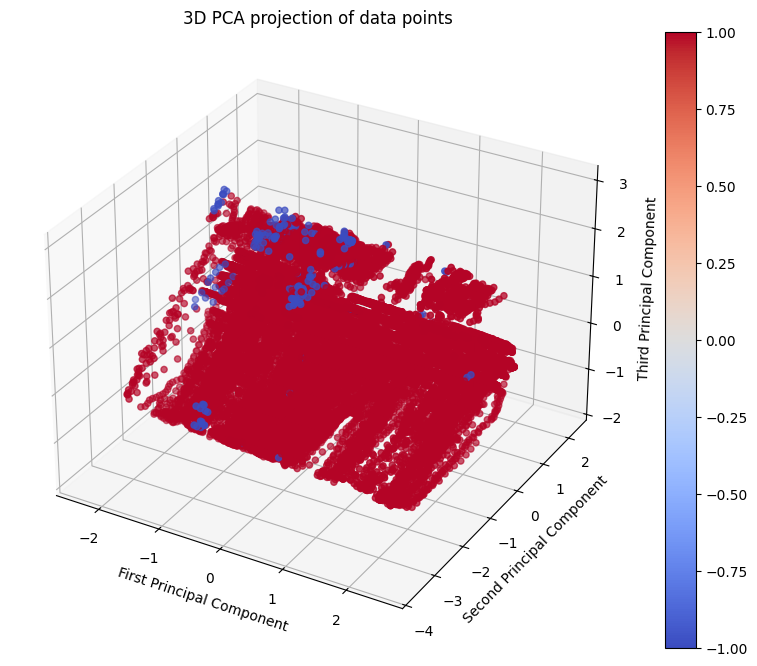

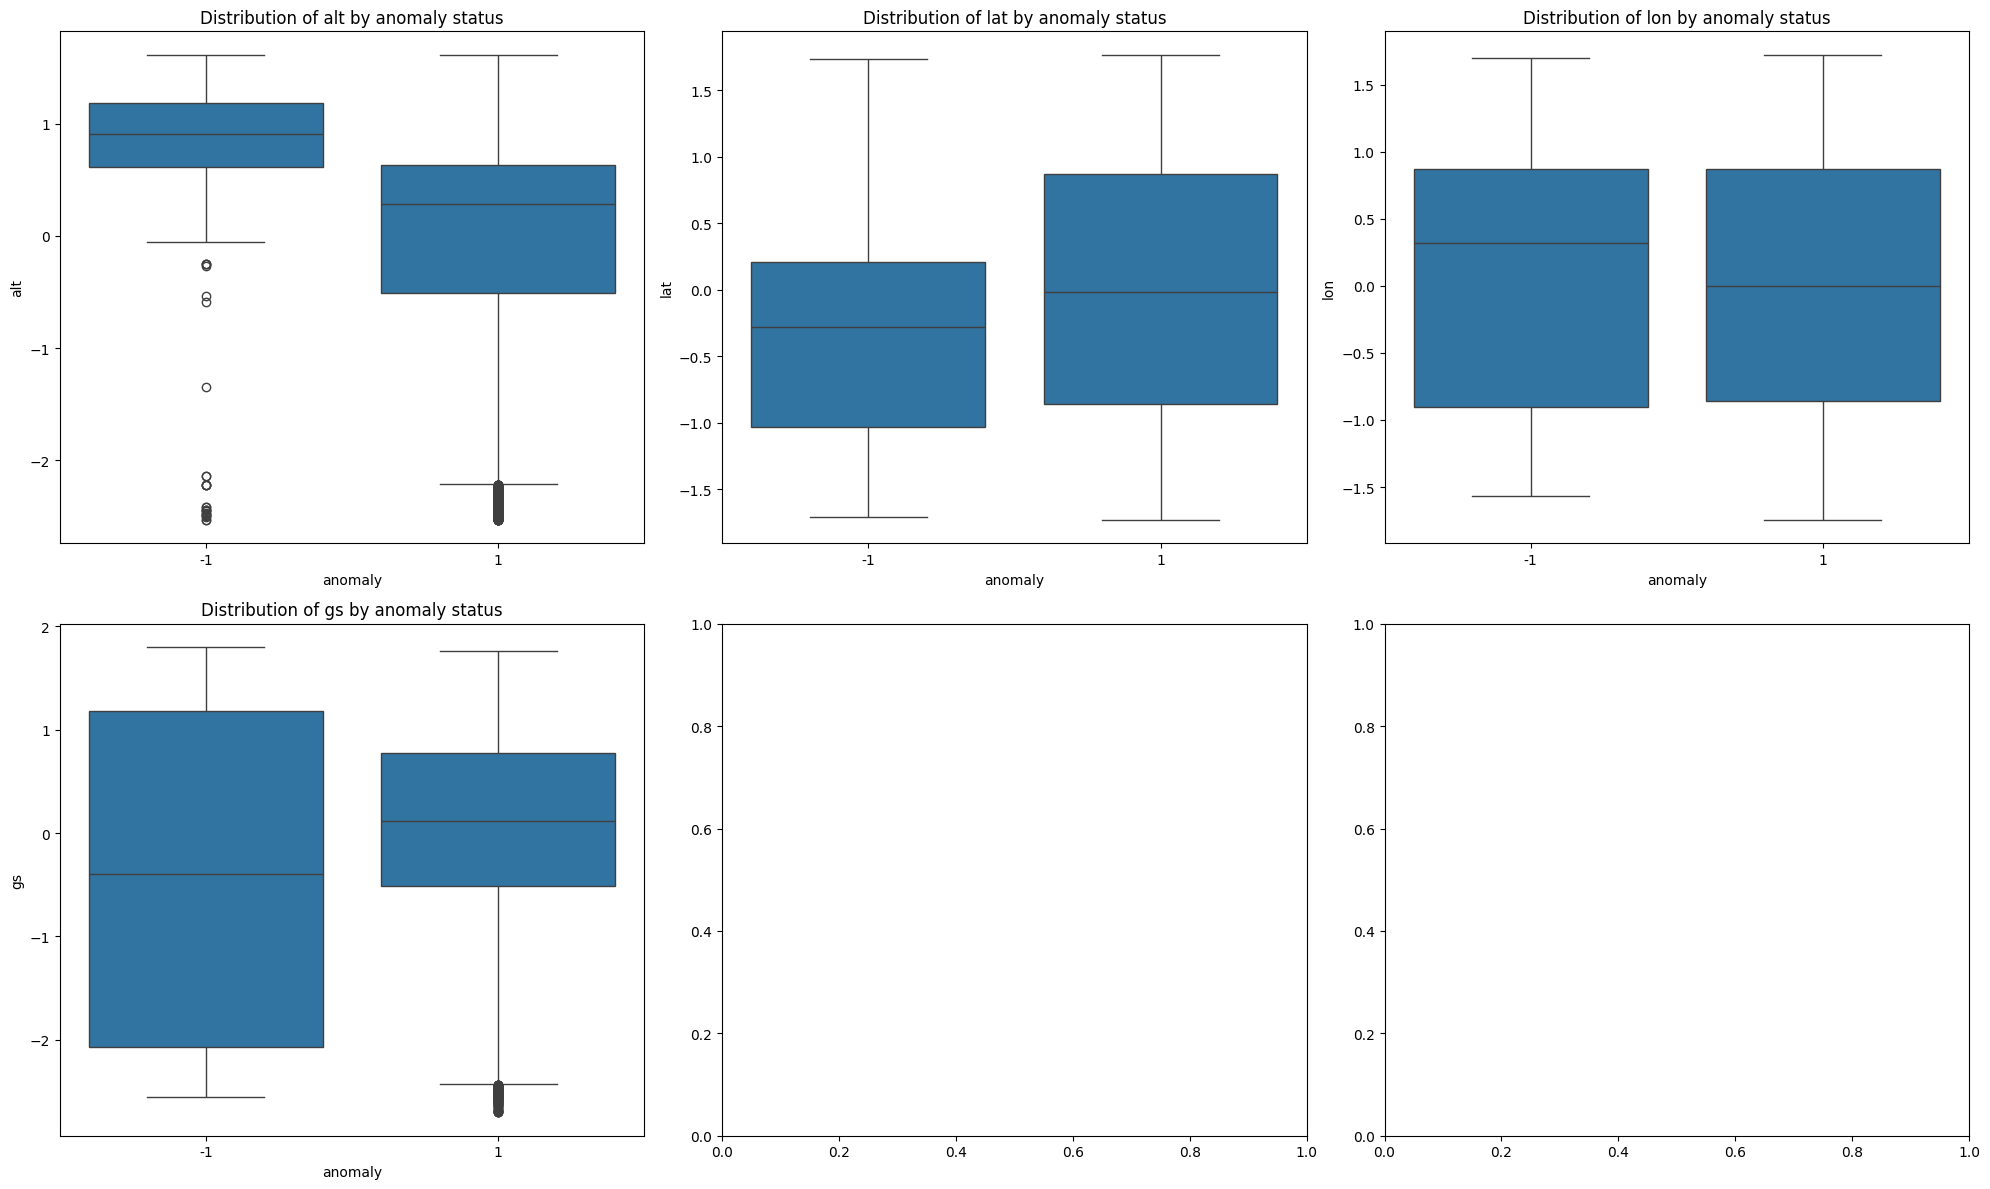

In [50]:
lof = LocalOutlierFactor(n_neighbors=167, contamination="auto")
analyze_and_visualize_anomalies(df_cleaned, data_for_LOF, lof)

In [76]:
import numpy as np
import pandas as pd

def add_anomalies_to_dataframe(df, columns, contamination=0.01, std_range=5):
    n_samples = len(df)
    n_anomalies = int(n_samples * contamination)

    # Create anomaly data
    anomaly_data = []
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        # Generate anomalies outside the std_range
        lower_anomalies = np.random.uniform(
            low=mean - 10*std,
            high=mean - std_range*std,
            size=n_anomalies // 2
        )
        upper_anomalies = np.random.uniform(
            low=mean + std_range*std,
            high=mean + 10*std,
            size=n_anomalies - n_anomalies // 2
        )
        anomaly_values = np.concatenate([lower_anomalies, upper_anomalies])
        np.random.shuffle(anomaly_values)
        anomaly_data.append(anomaly_values)

    # Create DataFrame with anomalies
    anomaly_df = pd.DataFrame(dict(zip(columns, anomaly_data)))

    # Add other columns with NaN values
    for col in df.columns:
        if col not in columns:
            anomaly_df[col] = np.nan

    # Add true_label column
    anomaly_df['true_label'] = 1

    # Concatenate original dataframe with anomaly dataframe
    df_with_anomalies = pd.concat([df, anomaly_df], ignore_index=True)

    # Fill NaN values in true_label column with 0 (for original data)
    df_with_anomalies['true_label'] = df_with_anomalies['true_label'].fillna(0)

    # Calculate actual percentage of anomalies
    actual_anomaly_percentage = (df_with_anomalies['true_label'].sum() / len(df_with_anomalies)) * 100

    return df_with_anomalies, actual_anomaly_percentage


# Add anomalies
contamination = 0.02
std_range = 15  # Anomalies will be beyond 5 standard deviations
df_with_anomalies, actual_anomaly_percentage = add_anomalies_to_dataframe(df_cleaned, data_for_LOF, contamination, std_range)

In [77]:
print(f"Original dataframe shape: {df_cleaned.shape}")
print(f"Dataframe with anomalies shape: {df_with_anomalies.shape}")
print(f"Number of anomalies added: {df_with_anomalies['true_label'].sum()}")
print(f"Actual percentage of anomalies: {actual_anomaly_percentage:.2f}%")

Original dataframe shape: (32839, 49)
Dataframe with anomalies shape: (33495, 50)
Number of anomalies added: 656.0
Actual percentage of anomalies: 1.96%


In [78]:
df_cleaned_modified, optimal_neighbors, lof = find_optimal_neighbors_incremental(df_with_anomalies, data_for_LOF, initial_neighbors= 5)
print(f"Optimal number of neighbors found: {optimal_neighbors}")

Neighbors: 5, Anomalies: 1735
Neighbors: 10, Anomalies: 1396
Neighbors: 15, Anomalies: 1253
Neighbors: 20, Anomalies: 1118
Neighbors: 25, Anomalies: 1040
Neighbors: 30, Anomalies: 976
Neighbors: 35, Anomalies: 922
Neighbors: 40, Anomalies: 978
Neighbors: 45, Anomalies: 1087
Neighbors: 50, Anomalies: 1148
Neighbors: 55, Anomalies: 1187
Neighbors: 60, Anomalies: 1242
Neighbors: 65, Anomalies: 1286
Stopping: No improvement for 6 consecutive steps.
Optimal number of neighbors found: 35


[0. 0. 0. ... 1. 1. 1.]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33490    1.0
33491    1.0
33492    1.0
33493    1.0
33494    1.0
Name: true_label, Length: 33495, dtype: float64


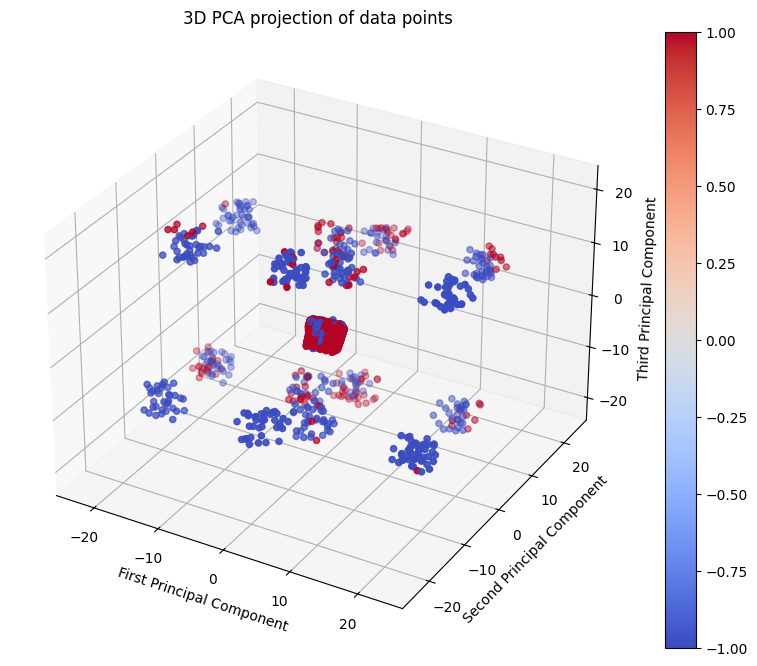

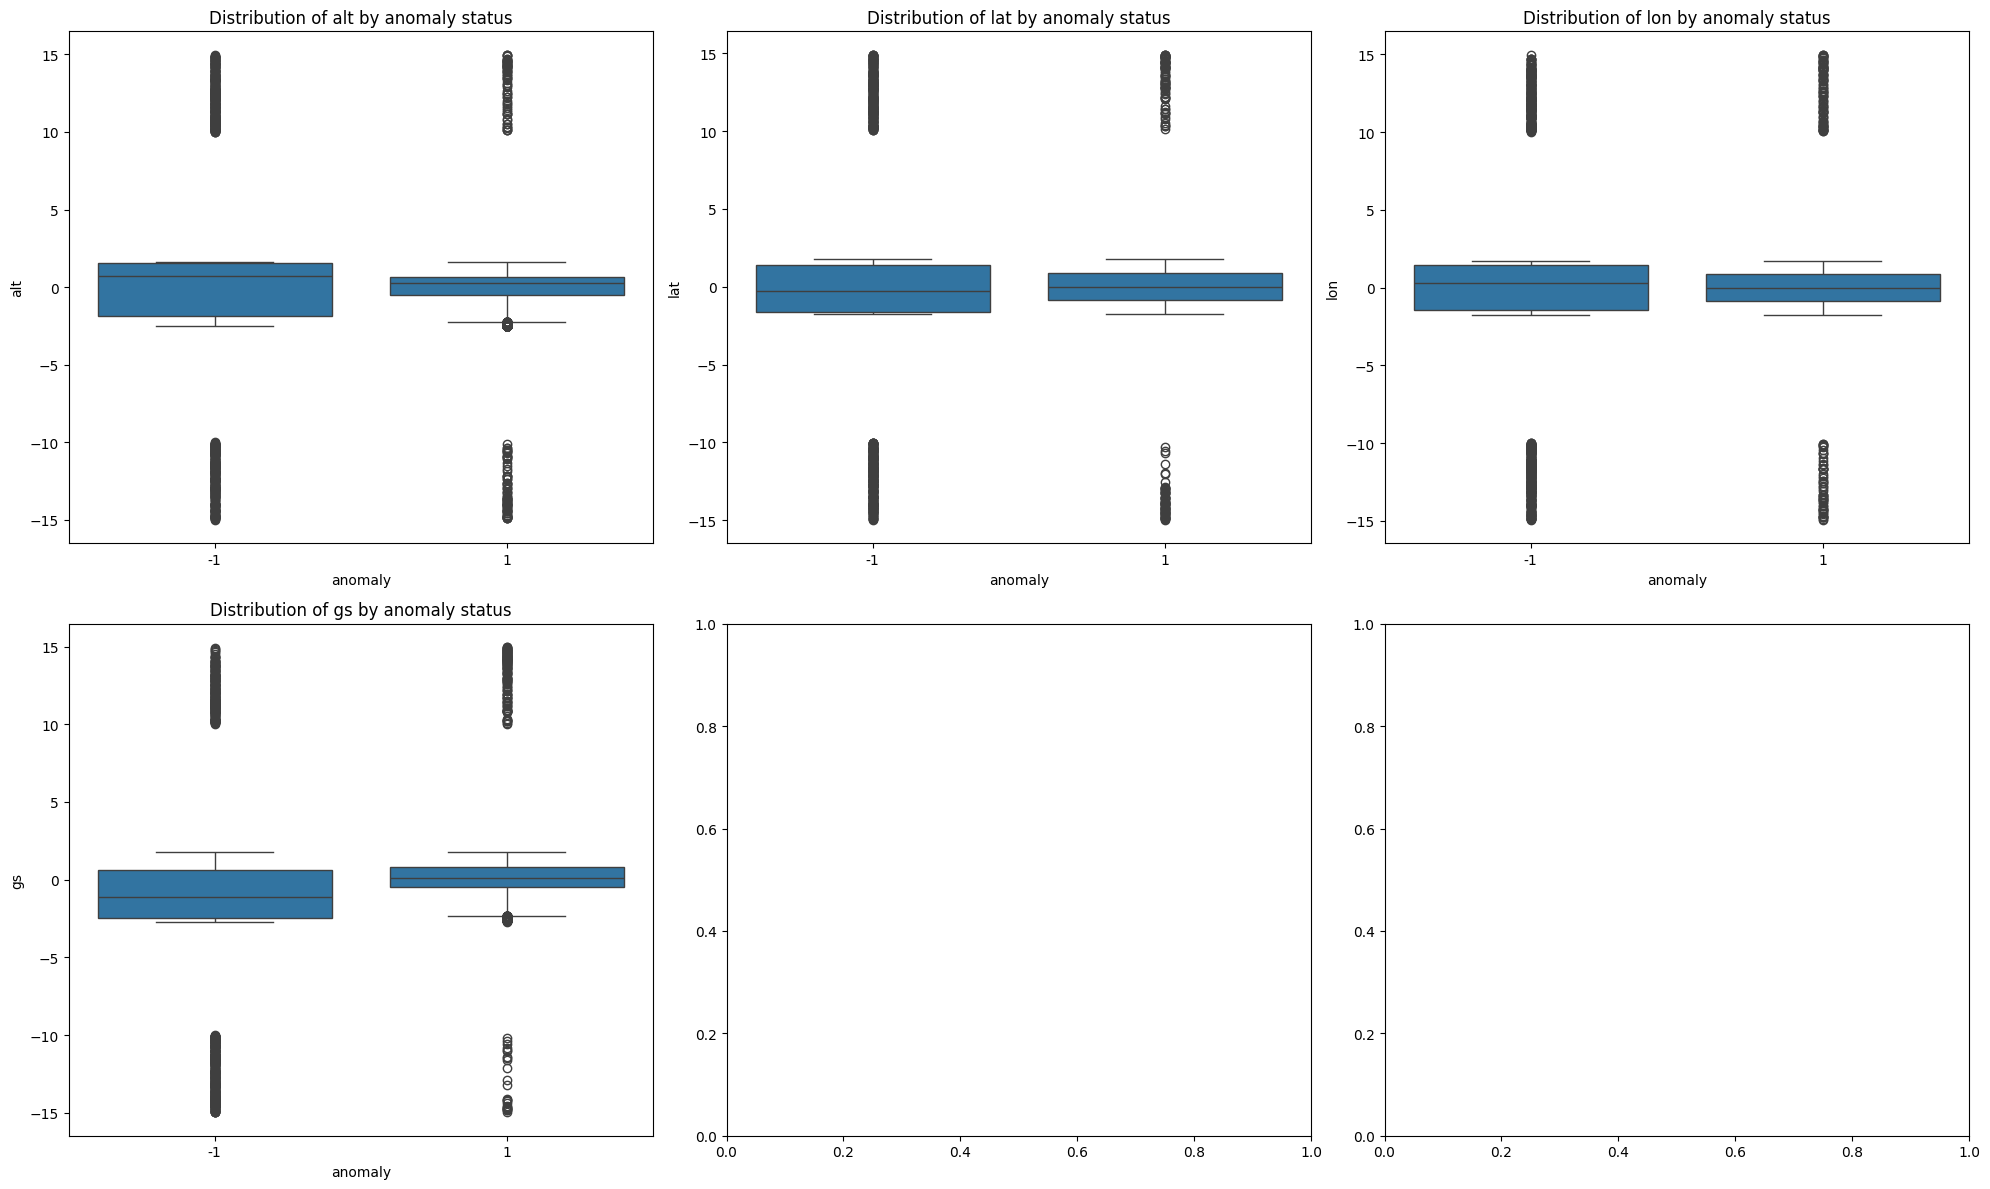

In [83]:
lof = LocalOutlierFactor(n_neighbors=optimal_neighbors, contamination="auto")
lof = LocalOutlierFactor(n_neighbors=optimal_neighbors, contamination="auto")
predictions = lof.fit_predict(df_cleaned_modified[data_for_LOF])


true_labels = df_cleaned_modified['true_label'].values
print(true_labels)
print(df_cleaned_modified['true_label'])
analyze_and_visualize_anomalies(df_cleaned_modified, data_for_LOF, lof)

In [80]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def anomaly_detection_pipeline(df, data_for_LOF, thresholds, percentages):
    results = []

    for threshold in thresholds:
        for percentage in percentages:
            # Add anomalies
            df_with_anomalies, actual_anomaly_percentage = add_anomalies_to_dataframe(
                df, data_for_LOF, contamination=percentage, std_range=threshold
            )

            # Find optimal neighbors
            df_cleaned_modified, optimal_neighbors, _ = find_optimal_neighbors_incremental(
                df_with_anomalies, data_for_LOF, initial_neighbors=5
            )

            # Perform LOF
            lof = LocalOutlierFactor(n_neighbors=optimal_neighbors, contamination="auto")
            predictions = lof.fit_predict(df_cleaned_modified[data_for_LOF])

            # Calculate metrics
            true_labels = df_cleaned_modified['true_label'].values
            cm = confusion_matrix(true_labels, predictions == -1)
            tn, fp, fn, tp = cm.ravel()

            accuracy = accuracy_score(true_labels, predictions == -1)
            precision = precision_score(true_labels, predictions == -1)
            recall = recall_score(true_labels, predictions == -1)

            results.append({
                'Threshold': threshold,
                'Percentage': percentage,
                'Actual Anomaly %': actual_anomaly_percentage,
                'Optimal Neighbors': optimal_neighbors,
                'TP': tp,
                'FP': fp,
                'FN': fn,
                'TN': tn,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall
            })

    return pd.DataFrame(results)

# Run the pipeline
thresholds = [5, 10, 15]
percentages = [0.01, 0.02, 0.05]
results_df = anomaly_detection_pipeline(df_cleaned, data_for_LOF, thresholds, percentages)

# Display results
print(results_df)

# Optionally, save results to a CSV file
results_df.to_csv('anomaly_detection_results.csv', index=False)

Neighbors: 5, Anomalies: 1733
Neighbors: 10, Anomalies: 1396
Neighbors: 15, Anomalies: 1253
Neighbors: 20, Anomalies: 1159
Neighbors: 25, Anomalies: 1190
Neighbors: 30, Anomalies: 1208
Neighbors: 35, Anomalies: 1187
Neighbors: 40, Anomalies: 1205
Neighbors: 45, Anomalies: 1215
Neighbors: 50, Anomalies: 1210
Stopping: No improvement for 6 consecutive steps.
Neighbors: 5, Anomalies: 1735
Neighbors: 10, Anomalies: 1396
Neighbors: 15, Anomalies: 1253
Neighbors: 20, Anomalies: 1118
Neighbors: 25, Anomalies: 1040
Neighbors: 30, Anomalies: 979
Neighbors: 35, Anomalies: 912
Neighbors: 40, Anomalies: 1006
Neighbors: 45, Anomalies: 1082
Neighbors: 50, Anomalies: 1142
Neighbors: 55, Anomalies: 1171
Neighbors: 60, Anomalies: 1217
Neighbors: 65, Anomalies: 1254
Stopping: No improvement for 6 consecutive steps.
Neighbors: 5, Anomalies: 1735
Neighbors: 10, Anomalies: 1396
Neighbors: 15, Anomalies: 1253
Neighbors: 20, Anomalies: 1118
Neighbors: 25, Anomalies: 1040
Neighbors: 30, Anomalies: 976
Neighbo